<a href="https://colab.research.google.com/github/saragamilmohamed/Feature-Engineering-and-EDA/blob/main/google%20play%20store/Google_Play_Store_Anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.2)

In [ ]:
play_store_data=pd.read_csv('googleplaystore.csv')

In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
for col in play_store_data.columns:
    pct_missing = np.mean(play_store_data[col].isnull())
    print('{}  -  {}%'.format(col, round(pct_missing*100)))

App  -  0%
Category  -  0%
Rating  -  14%
Reviews  -  0%
Size  -  0%
Installs  -  0%
Type  -  0%
Price  -  0%
Content Rating  -  0%
Genres  -  0%
Last Updated  -  0%
Current Ver  -  0%
Android Ver  -  0%


In [ ]:
play_store_data.dropna(inplace=True)
play_store_data.shape

(9360, 13)

In [ ]:
play_store_data.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
play_store_data.duplicated() .sum()

474

In [ ]:
play_store_data.drop_duplicates(inplace = True)
play_store_data.shape

(8886, 13)

In [ ]:

def fun(x):
    if type(x)==str:
        k=int(x)

        return k
    else:
        return False




In [ ]:
#to convert data type of reviews to numerical data
play_store_data['Reviews']=play_store_data['Reviews'].apply(fun)
play_store_data['Reviews']=play_store_data['Reviews'].sort_values(ascending=False)
play_store_data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8886, dtype: int64

In [ ]:
#to convert data type of installs to numerical data
play_store_data['Installs'] = play_store_data['Installs'].str.replace('+','',regex=True).replace(',','',regex=True)
play_store_data['Installs']=play_store_data['Installs'].apply(fun)
play_store_data.sort_values(by=['Installs'],ascending =False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,1000000000,Free,0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,CQ ESPM,BUSINESS,5.0,2,3.4M,5,Free,0,Everyone,Business,"June 3, 2017",1.0.1,4.1 and up
9218,EB Cash Collections,BUSINESS,5.0,1,4.3M,5,Free,0,Everyone,Business,"July 31, 2018",1.10,4.4 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up


In [ ]:
size_edit={
    '.':'',
    'k':'000',
    'M':'000000'
}
for x,y in size_edit.items():
    play_store_data['Size']=play_store_data['Size'].str.replace(x,y,regex=True)

play_store_data['Size'].head()

0    19000000
1    14000000
2    87000000
3    25000000
4    28000000
Name: Size, dtype: object

If the rows which has 'Size' column with "varies with device" value have dropped, we will lose %16.51 of our data.

In [ ]:
print('{}%'.format(play_store_data[play_store_data['Size'] == 'Varies with device' ].shape[0]/play_store_data.shape[0]*100))

16.520369119963988%


In [ ]:
def varies_values(value):
    if value =='Varies with device':
        value=0
        return value
    else:
        return value
play_store_data['Size']=play_store_data['Size'].apply(varies_values)
play_store_data['Size']



0        19000000
1        14000000
2        87000000
3        25000000
4        28000000
           ...   
10834    26000000
10836    53000000
10837    36000000
10839           0
10840    19000000
Name: Size, Length: 8886, dtype: object

In [ ]:
#to convert data type of size to numerical data
play_store_data['Size']=play_store_data['Size'].apply(fun)

In [ ]:
def fun1(x):
    if type(x)==str:
        k=float(x)
        return k
    else:
        return False

In [ ]:
play_store_data['Price'] = play_store_data['Price'].str.replace('$','', regex=True)
play_store_data['Price']=play_store_data['Price'] .apply(fun1)

In [ ]:
play_store_data["Last Updated"]=pd.to_datetime(play_store_data["Last Updated"])
play_store_data["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 8886, dtype: datetime64[ns]

In [ ]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,26000000,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000000,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,False,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device



### Relation between each Category and its count

In [ ]:
xx=[play_store_data['Category'].unique()]
yy=[play_store_data['Category'].value_counts().values]

yy=[1746, 1097,  733,  351,  350,  328,  323,  319,  317,  314,  312,303,  297,  259,  238,  233,  226,  195,  178,  160,  155,  149,24,  109,   76,   75,   73,   64,   61,   58,   50,   45,   42]
xx=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

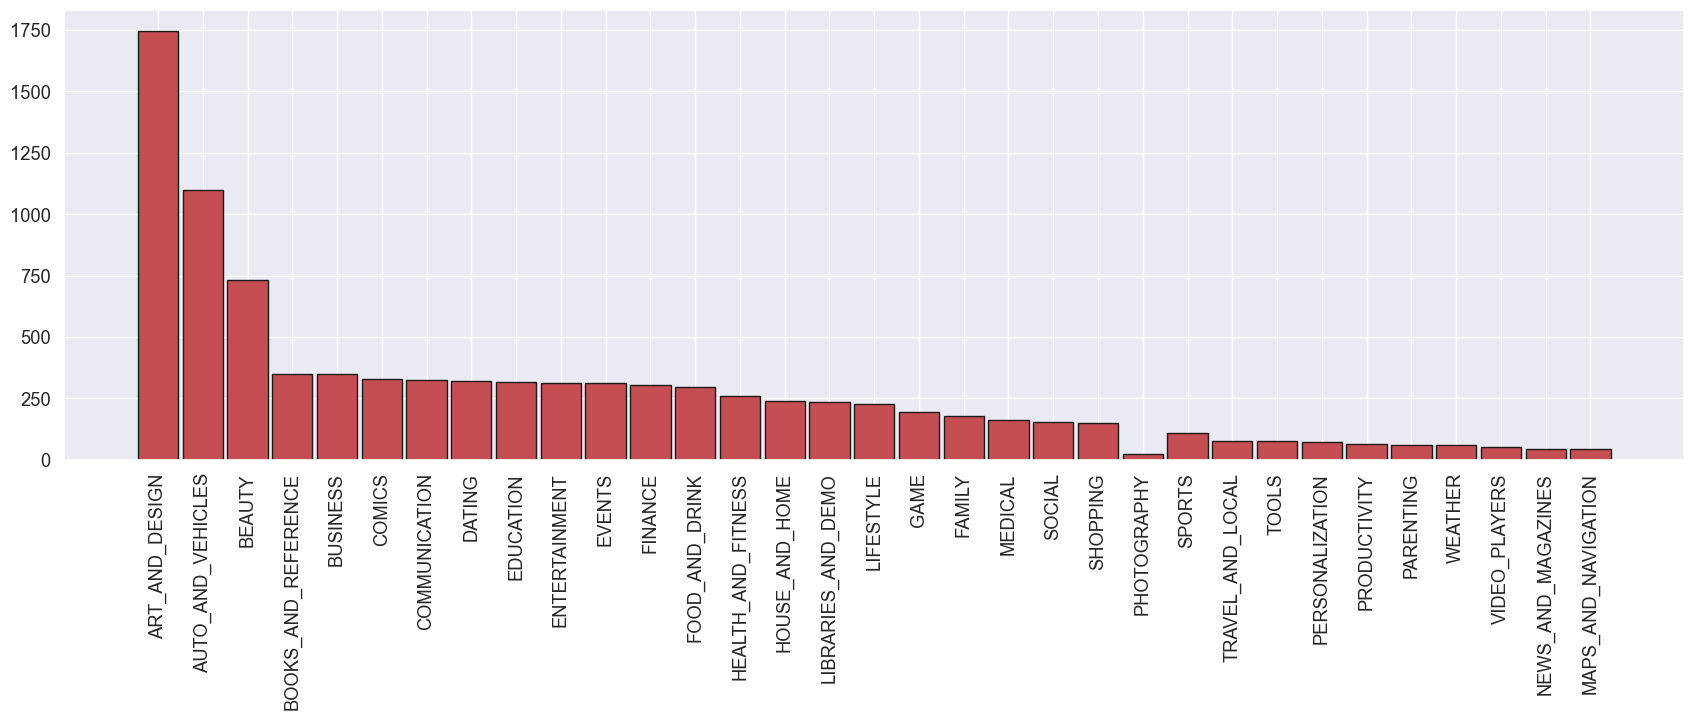

In [ ]:
fig_6 = plt.figure(figsize=(18,5),dpi=100)
axes_6 = fig_6.add_axes([0.9,0.9,0.9,0.9])
plt.bar(xx,yy,width=.9,facecolor='r',edgecolor='k')
plt.xticks(rotation=90)
plt.show()

### The rate of change in each category

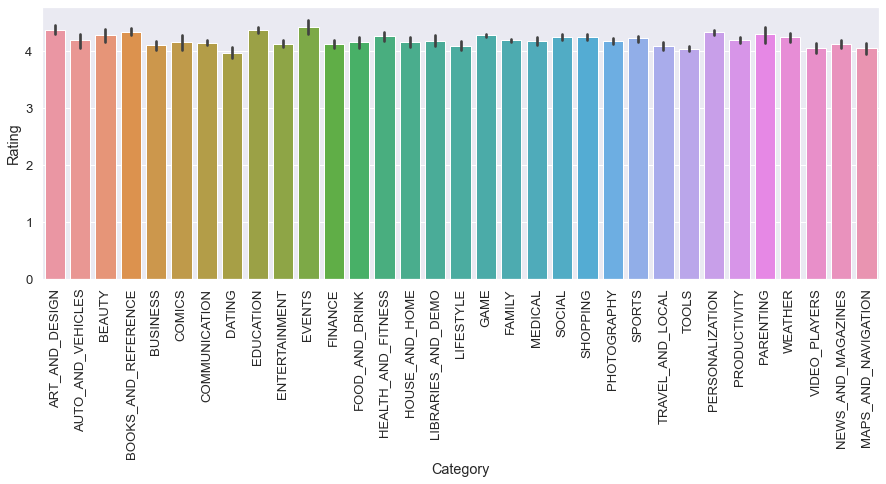

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=play_store_data['Category'],y=play_store_data['Rating'])
plt.xticks(rotation=90)
plt.show()

### What is the percentage of paid applications and  free applications?

In [ ]:
play_store_data['Type'].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x25ed6a89b80>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0842027489551738, -0.237916790408001, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.12%'),
  Text(0.595823132308699, -0.13074706499899152, '6.88%')])

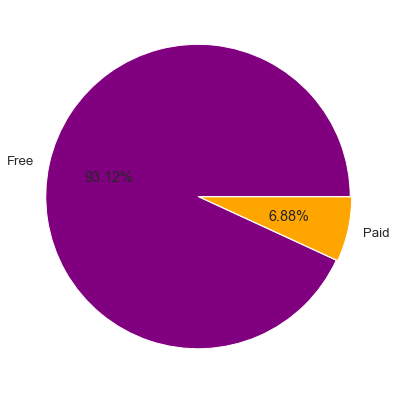

In [ ]:
plt.pie(play_store_data['Type'].value_counts(),labels=play_store_data['Type'].unique(),autopct='%1.2f%%',colors=['purple','orange'],explode=[0,.01])

### What is the data correlation rate?

In [ ]:
correlation=play_store_data.corr()


<AxesSubplot:>

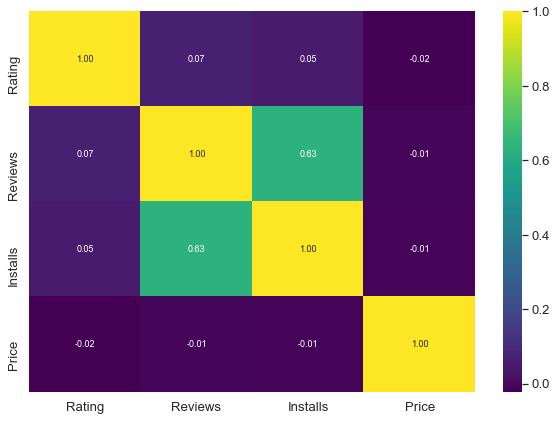

In [ ]:
sns.heatmap(correlation,cbar=True, square=False, fmt='.2f',annot=True, annot_kws={'size':9}, cmap='viridis')

### The rate of change in price, size, reviews and ratings every year   type of apps

In [ ]:
play_store_data['year'] =pd.DatetimeIndex(play_store_data["Last Updated"]).year

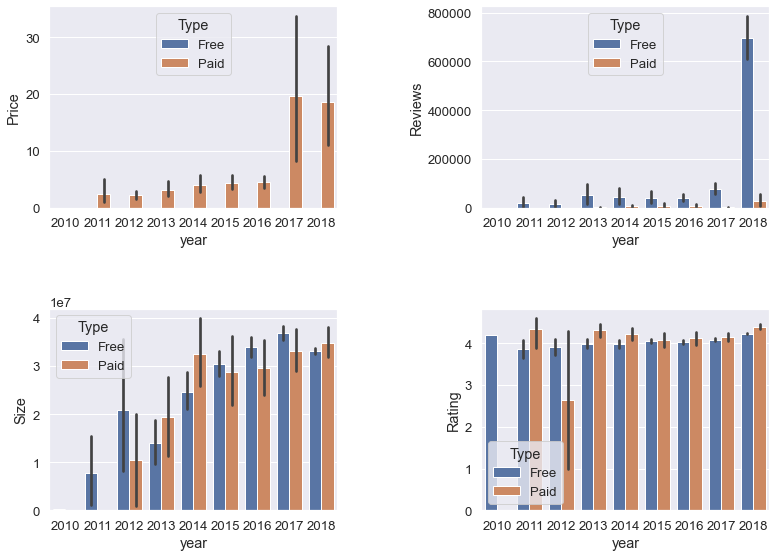

In [ ]:
plt.subplot(2,2,1)
sns.barplot(x=play_store_data['year'],y=play_store_data['Price'],hue=play_store_data['Type'])
plt.subplot(2,2,2)
sns.barplot(x=play_store_data['year'],y=play_store_data['Reviews'],hue=play_store_data['Type'])
plt.subplot(2,2,3)
sns.barplot(x=play_store_data['year'],y=play_store_data['Size'],hue=play_store_data['Type'])
plt.subplot(2,2,4)
sns.barplot(x=play_store_data['year'],y=play_store_data['Rating'],hue=play_store_data['Type'])

plt.subplots_adjust(left=0,right=1
                    ,bottom=0,top=1
                    ,wspace=.5,hspace=.5)

### The 10 most common apps that used by Everyone

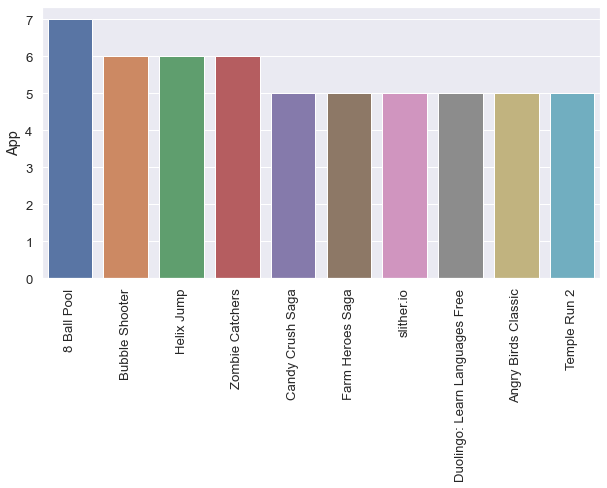

In [ ]:
plt.figure(figsize=(10,5))
xx=play_store_data[play_store_data['Content Rating']=='Everyone']['App']
y=play_store_data[play_store_data['Content Rating']=='Everyone']['App'].value_counts().head(10)
sns.barplot(x=y.index,y=y)
plt.xticks(rotation=90)
plt.show()

### Relation between Number of Downloads &Reviews

<AxesSubplot:xlabel='Installs', ylabel='Reviews'>

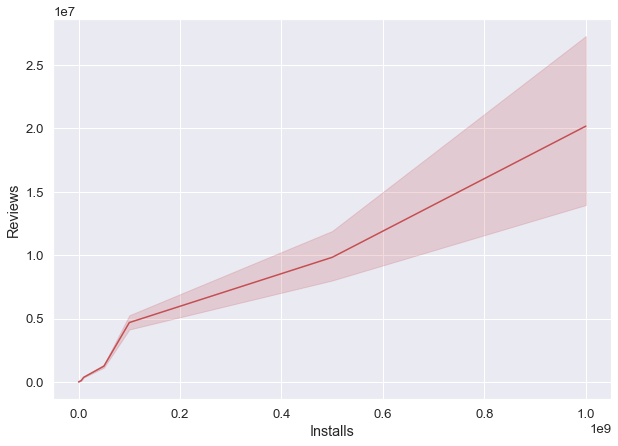

In [ ]:
sns.lineplot(x=play_store_data['Installs'],y=play_store_data['Reviews'],color='r')

### Relation between Rating & Reviews

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

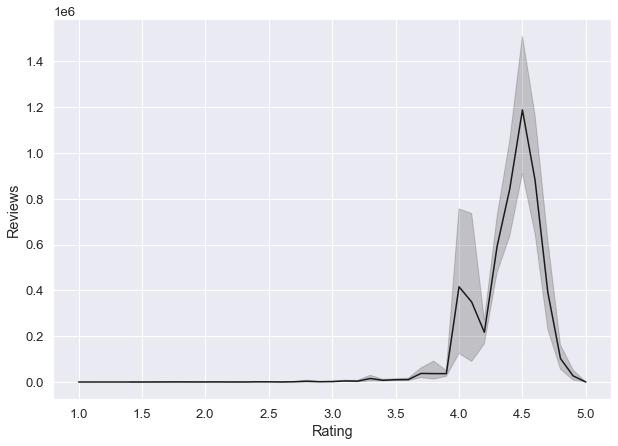

In [ ]:
sns.lineplot(x=play_store_data['Rating'],y=play_store_data['Reviews'],color='k')

### the 15 highest Rating in data

In [ ]:
x=play_store_data['Rating'].value_counts().head(15)


[1031, 1016, 976, 887, 768, 656, 538, 484, 372, 293, 271, 231, 228, 169, 157]

<AxesSubplot:>

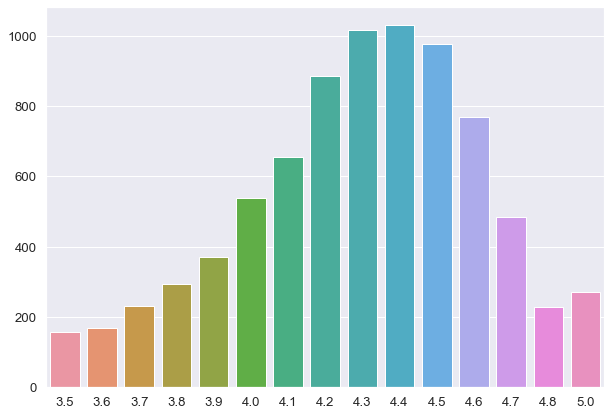

In [ ]:
sns.barplot(x=x.index,y=x.values)

###  highest Content Rating

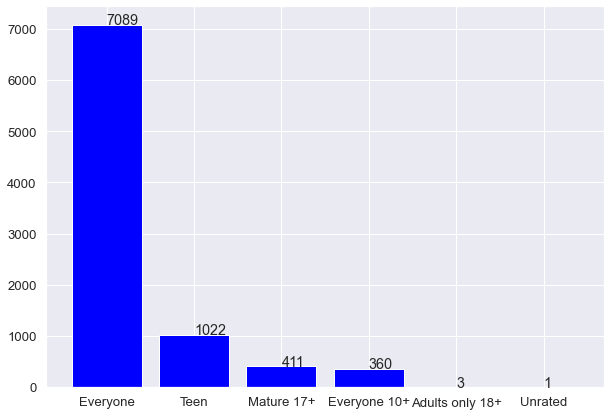

In [ ]:
x=list(play_store_data['Content Rating'].value_counts().index)
y=list(play_store_data['Content Rating'].value_counts().values)
plt.bar(x,y,color='blue')

for xx , yy in zip(x,y):
    plt.text(xx,yy,yy)

plt.show()

### top10 Expensive Apps

In [ ]:
new_order=play_store_data.sort_values(by='Price',ascending=False,inplace=False)
Apps=list(new_order.head(15)['App'])
Price=list(new_order['Price'].head(15))



<function matplotlib.pyplot.show(close=None, block=None)>

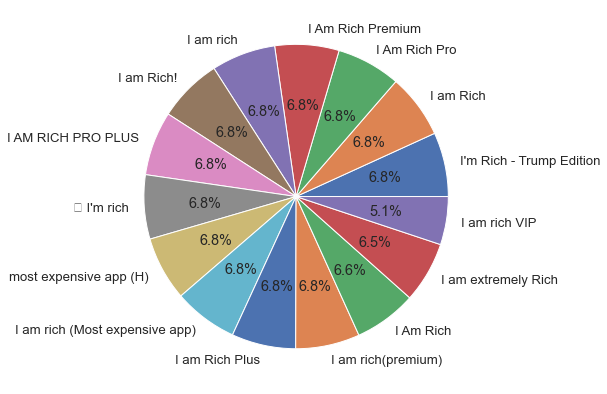

In [ ]:
plt.pie(x=Price,labels=Apps,autopct ='%1.1f%%')
plt.show

In [ ]:
x=play_store_data[play_store_data['Type']=='Paid'].sort_values(by=['Price'], ascending=False).head(10)

In [ ]:
x

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,73000000,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5369,I am Rich,FINANCE,4.3,180,38000000,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5362,I Am Rich Pro,FAMILY,4.4,201,27000000,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,47000000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5351,I am rich,LIFESTYLE,3.8,3547,18000000,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22000000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4197,most expensive app (H),FAMILY,4.3,6,15000000,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,27000000,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
